In [142]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [26]:
from pyannote.core import Annotation, Segment

In [80]:
#load in our metadata so we can get the mp3 link(s) we need
metaDf = pd.read_json("/shared/3/projects/benlitterer/podcastData/processed/mayJune/mayJuneMetadata.jsonl", orient="records", lines=True)

In [82]:
lookupDf = metaDf[["enclosure", "potentialOutPath", "epTitle", "epDescription", "rssUrl"]]

In [83]:
lookupDf["potentialOutPath"] ="/shared/3/projects/benlitterer/podcastData/diarization/mayJune" +  lookupDf["potentialOutPath"]  

/tmp/ipykernel_66996/1741585834.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lookupDf["potentialOutPath"] ="/shared/3/projects/benlitterer/podcastData/diarization/mayJune" +  lookupDf["potentialOutPath"]


In [86]:
lookupDf = lookupDf.set_index("potentialOutPath")

episode url: https://mcdn.podbean.com/mf/web/0e8don/liveshow_202005311600.mp3


(9.2, 10.2)

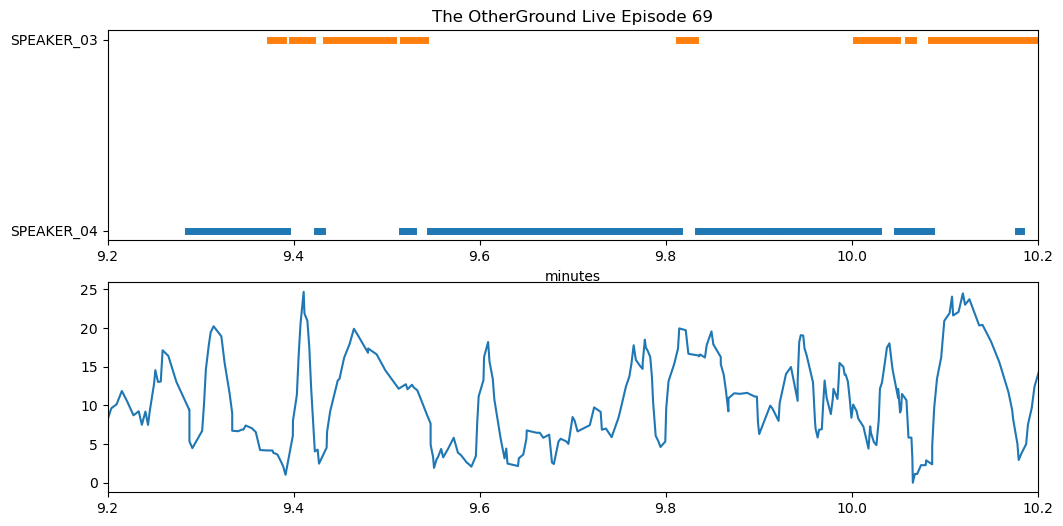

In [147]:

#first, let's just try to get a demo up and running
#get a diarization file  
testPath = "/shared/3/projects/benlitterer/podcastData/diarization/mayJune/mcdn.podbean.com/0e/httpsmcdn.podbean.commfweb0e8donliveshow_202005311600.mp3.rttm"
cols = ["dummy1", "dummy2", "dummy3", "start", "duration", "dummy4", "dummy5", "speakerNum", "dummy6", "dummy7"]
testDf = pd.read_csv(testPath, sep=" ", names=cols)
testDf = testDf[["start", "duration", "speakerNum"]]
testDf["end"] = testDf["start"] + testDf["duration"]
testDf["start"] = testDf["start"] / 60
testDf["end"] = testDf["end"] / 60

#this gets us this files corresponding information from the metadata
epInfo = lookupDf.loc[testPath.replace(".rttm", "MERGED")]

#where to start and end our visualization (in minutes)
START
print(f'episode url: {epInfo["enclosure"]}')
segDf = testDf[(testDf["start"] > 9) & (testDf["end"] < 10.25)]
xStart = min(segDf["start"])
xEnd = max(segDf["end"])

palette = sns.color_palette("tab10").as_hex()
#between each vline we want a certain space 
speakerDict = {}
colorDict = {}
speakerCount = 1
speakerList = []
for speaker in segDf["speakerNum"].unique(): 
    speakerList.append(speaker)
    speakerDict[speaker] = speakerCount
    colorDict[speaker] = palette[speakerCount - 1]
    speakerCount += 1

fig, axs = plt.subplots(2, 1, figsize=(12, 6))

for i, row in segDf.iterrows(): 
    speakerNum = row["speakerNum"]
    yVal = speakerDict[speakerNum]
    axs[0].plot([row["start"], row["end"]], [yVal, yVal], color=colorDict[speakerNum], linewidth=5)

speakerRange = [i for i in range(1, len(segDf["speakerNum"].unique())+1)]

axs[0].set_yticks(speakerRange, [speakerList[i-1] for i in speakerRange])

axs[0].set_title(epInfo["epTitle"])
axs[0].set_xlabel("minutes")


#let's look at the pitch for this segment 
mergedPath = "/shared/3/projects/benlitterer/podcastData/prosodyMerged/floydMonth/mcdn.podbean.com/0e/httpsmcdn.podbean.commfweb0e8donliveshow_202005311600.mp3MERGED"
mergedDf = pd.read_csv(mergedPath)
mergedDf["start"] = mergedDf["start"] / 60
mergedDf["end"] = mergedDf["end"] / 60
mergedDf = mergedDf[(mergedDf["start"] > 9) & (mergedDf["start"] < 10.25)]

mergedDf["F0rolling"] = mergedDf["F0semitoneFrom27.5Hz_sma3nz"].rolling(6).apply(np.mean) 
#mergedDf = mergedDf[mergedDf["F0semitoneFrom27.5Hz_sma3nz"] > 0]
axs[1].plot(mergedDf["start"], mergedDf["F0rolling"])

axs[0].set_xlim(9.2, 10.2)
axs[1].set_xlim(9.2, 10.2)

episode url: https://mcdn.podbean.com/mf/web/0e8don/liveshow_202005311600.mp3


(1.0, 10.0)

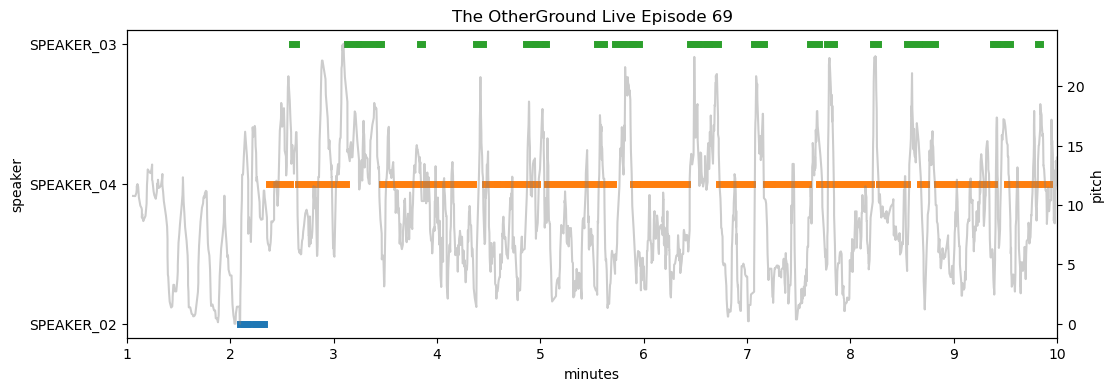

In [155]:

START = 1
END = 10
#first, let's just try to get a demo up and running
#get a test file 
testPath = "/shared/3/projects/benlitterer/podcastData/diarization/mayJune/mcdn.podbean.com/0e/httpsmcdn.podbean.commfweb0e8donliveshow_202005311600.mp3.rttm"
cols = ["dummy1", "dummy2", "dummy3", "start", "duration", "dummy4", "dummy5", "speakerNum", "dummy6", "dummy7"]
testDf = pd.read_csv(testPath, sep=" ", names=cols)
testDf = testDf[["start", "duration", "speakerNum"]]
testDf["end"] = testDf["start"] + testDf["duration"]
testDf["start"] = testDf["start"] / 60
testDf["end"] = testDf["end"] / 60

epInfo = lookupDf.loc[testPath.replace(".rttm", "MERGED")]

print(f'episode url: {epInfo["enclosure"]}')
segDf = testDf[(testDf["start"] > START) & (testDf["end"] < END)]
xStart = min(segDf["start"])
xEnd = max(segDf["end"])

palette = sns.color_palette("tab10").as_hex()
#between each vline we want a certain space 
speakerDict = {}
colorDict = {}
speakerCount = 1
speakerList = []
for speaker in segDf["speakerNum"].unique(): 
    speakerList.append(speaker)
    speakerDict[speaker] = speakerCount
    colorDict[speaker] = palette[speakerCount - 1]
    speakerCount += 1

fig, ax1 = plt.subplots(1, 1, figsize=(12, 4))

for i, row in segDf.iterrows(): 
    speakerNum = row["speakerNum"]
    yVal = speakerDict[speakerNum]
    ax1.plot([row["start"], row["end"]], [yVal, yVal], color=colorDict[speakerNum], linewidth=5)

speakerRange = [i for i in range(1, len(segDf["speakerNum"].unique())+1)]

ax1.set_yticks(speakerRange, [speakerList[i-1] for i in speakerRange])

ax1.set_title(epInfo["epTitle"])
ax1.set_xlabel("minutes")
ax1.set_ylabel("speaker")

ax2 = ax1.twinx()

#let's look at the pitch for this segment 
mergedPath = "/shared/3/projects/benlitterer/podcastData/prosodyMerged/floydMonth/mcdn.podbean.com/0e/httpsmcdn.podbean.commfweb0e8donliveshow_202005311600.mp3MERGED"
mergedDf = pd.read_csv(mergedPath)
mergedDf["start"] = mergedDf["start"] / 60
mergedDf["end"] = mergedDf["end"] / 60
mergedDf = mergedDf[(mergedDf["start"] > START) & (mergedDf["start"] < END)]

mergedDf["F0rolling"] = mergedDf["F0semitoneFrom27.5Hz_sma3nz"].rolling(10).apply(np.mean) 
#mergedDf = mergedDf[mergedDf["F0semitoneFrom27.5Hz_sma3nz"] > 0]
ax2.plot(mergedDf["start"], mergedDf["F0rolling"], color="grey", alpha=.4)
ax2.set_ylabel("pitch")

ax2.set_xlim(START, END)
ax2.set_xlim(START, END)

In [132]:
#let's look at the pitch for this segment 
mergedPath = "/shared/3/projects/benlitterer/podcastData/prosodyMerged/floydMonth/mcdn.podbean.com/0e/httpsmcdn.podbean.commfweb0e8donliveshow_202005311600.mp3MERGED"
mergedDf = pd.read_csv(mergedPath)
mergedDf["start"] = mergedDf["start"] / 60
mergedDf["end"] = mergedDf["end"] / 60
mergedDf = mergedDf[(mergedDf["start"] > 9) & (mergedDf["start"] < 10.25)]
#mergedDf.head(F0semitoneFrom27.5Hz_sma3nz) 

In [136]:
mergedDf = mergedDf[mergedDf["F0semitoneFrom27.5Hz_sma3nz"] > 0]

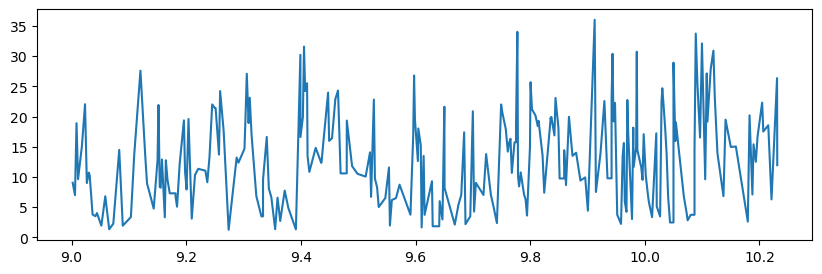

In [137]:
fig, ax = plt.subplots(figsize=(10, 3))
ax.plot(mergedDf["start"], mergedDf["F0semitoneFrom27.5Hz_sma3nz"])

episode url: https://soggynachoshome.files.wordpress.com/2020/06/sn-episode-111-_blm_-06_02_2020.mp3


Text(0.5, 0, 'minutes')

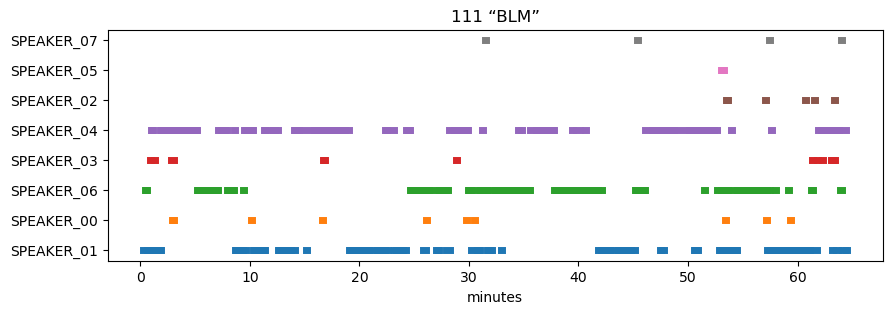

In [176]:

#first, let's just try to get a demo up and running
#IRENA: you want to change this path to whatever file you're interested in 
testPath = "/shared/3/projects/benlitterer/podcastData/diarization/mayJune/soggynachoshome.files.wordpress.com/02/httpssoggynachoshome.files.wordpress.com202006snepisode111_blm_06_02_2020.mp3.rttm"
cols = ["dummy1", "dummy2", "dummy3", "start", "duration", "dummy4", "dummy5", "speakerNum", "dummy6", "dummy7"]
testDf = pd.read_csv(testPath, sep=" ", names=cols)
testDf = testDf[["start", "duration", "speakerNum"]]
testDf["end"] = testDf["start"] + testDf["duration"]
testDf["start"] = testDf["start"] / 60
testDf["end"] = testDf["end"] / 60

#get the metadata corresponding to this diarization file
epInfo = lookupDf.loc[testPath.replace(".rttm", "MERGED")]

#where to start and end the snippets in minutes 
#IRENA: you want to change these to whatever snippet of the episode you want to listen to 
START=10
END=20

print(f'episode url: {epInfo["enclosure"]}')
segDf = testDf[(testDf["start"] > START) & (testDf["end"] < END)]
#segDf = testDf
xStart = min(segDf["start"])
xEnd = max(segDf["end"])

palette = sns.color_palette("tab10").as_hex()
#between each vline we want a certain space 
speakerDict = {}
colorDict = {}
speakerCount = 1
speakerList = []
for speaker in segDf["speakerNum"].unique(): 
    speakerList.append(speaker)
    speakerDict[speaker] = speakerCount
    colorDict[speaker] = palette[speakerCount - 1]
    speakerCount += 1

fig, ax = plt.subplots(figsize=(10, 3))

for i, row in segDf.iterrows(): 
    speakerNum = row["speakerNum"]
    yVal = speakerDict[speakerNum]
    ax.plot([row["start"], row["end"]], [yVal, yVal], color=colorDict[speakerNum], linewidth=5)

speakerRange = [i for i in range(1, len(segDf["speakerNum"].unique())+1)]

ax.set_yticks(speakerRange, [speakerList[i-1] for i in speakerRange])

ax.set_title(epInfo["epTitle"])
ax.set_xlabel("minutes")
    

In [112]:
#in the example above, 01 is jarnell, charles is 06 and 00 (maybe?) and Frank is 03, and 04 

,enclosure,epTitle,epDescription,rssUrl
potentialOutPath,,,,
/shared/3/projects/benlitterer/podcastData/diarization/mayJune/yallheard.me/po/httpyallheard.mepodcastdownload800doppelgangers.mp3MERGED,http://yallheard.me/podcast-download/800/doppe...,Doppelgangers,Your hosts are in rare form today. Pete&#8217;...,http://yallheard.me/feed/podcast/
/shared/3/projects/benlitterer/podcastData/diarization/mayJune/yallheard.me/po/httpyallheard.mepodcastdownload800doppelgangers.mp3MERGED,http://yallheard.me/podcast-download/800/doppe...,Doppelgangers,Your hosts are in rare form today. Pete&#8217;...,http://yallheard.me/feed/podcast/yall-heard/


episode url: http://yallheard.me/podcast-download/800/doppelgangers.mp3


Text(0.5, 0, 'minutes')

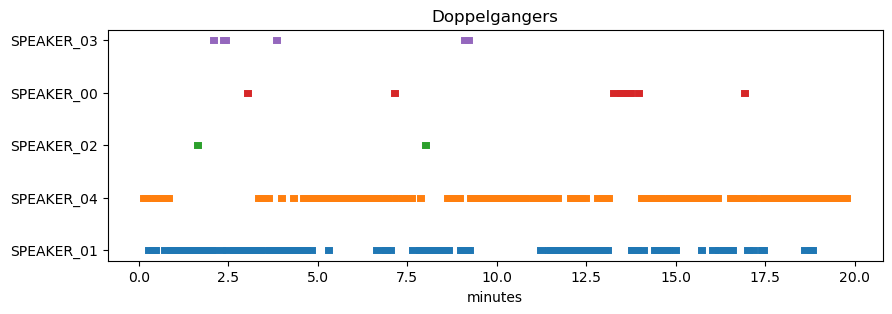

In [118]:


#first, let's just try to get a demo up and running
#get a test file 
testPath = "/shared/3/projects/benlitterer/podcastData/diarization/mayJune/yallheard.me/po/httpyallheard.mepodcastdownload800doppelgangers.mp3.rttm"
cols = ["dummy1", "dummy2", "dummy3", "start", "duration", "dummy4", "dummy5", "speakerNum", "dummy6", "dummy7"]
testDf = pd.read_csv(testPath, sep=" ", names=cols)
testDf = testDf[["start", "duration", "speakerNum"]]
testDf["end"] = testDf["start"] + testDf["duration"]
testDf["start"] = testDf["start"] / 60
testDf["end"] = testDf["end"] / 60

epInfo = lookupDf.loc[testPath.replace(".rttm", "MERGED")].iloc[0]

print(f'episode url: {epInfo["enclosure"]}')
segDf = testDf[(testDf["start"] > 0) & (testDf["end"] < 20)]
xStart = min(segDf["start"])
xEnd = max(segDf["end"])

palette = sns.color_palette("tab10").as_hex()
#between each vline we want a certain space 
speakerDict = {}
colorDict = {}
speakerCount = 1
speakerList = []
for speaker in segDf["speakerNum"].unique(): 
    speakerList.append(speaker)
    speakerDict[speaker] = speakerCount
    colorDict[speaker] = palette[speakerCount - 1]
    speakerCount += 1

fig, ax = plt.subplots(figsize=(10, 3))

for i, row in segDf.iterrows(): 
    speakerNum = row["speakerNum"]
    yVal = speakerDict[speakerNum]
    ax.plot([row["start"], row["end"]], [yVal, yVal], color=colorDict[speakerNum], linewidth=5)

speakerRange = [i for i in range(1, len(segDf["speakerNum"].unique())+1)]

ax.set_yticks(speakerRange, [speakerList[i-1] for i in speakerRange])

ax.set_title(epInfo["epTitle"])
ax.set_xlabel("minutes")

episode url: http://yallheard.me/podcast-download/800/doppelgangers.mp3


Text(0.5, 0, 'minutes')

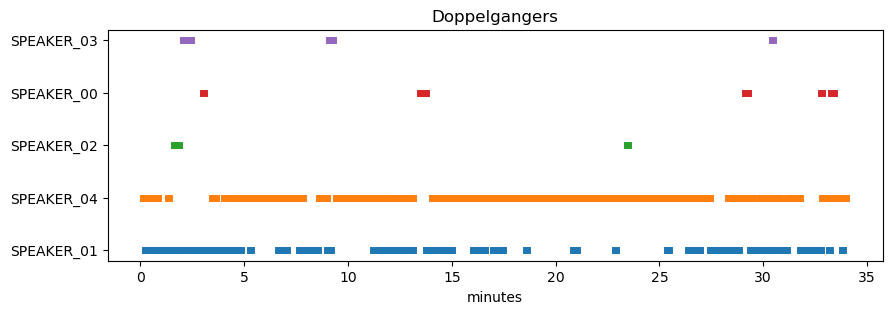

In [175]:

#first, let's just try to get a demo up and running
#get a test file 
testPath = "/shared/3/projects/benlitterer/podcastData/diarization/mayJune/yallheard.me/po/httpyallheard.mepodcastdownload800doppelgangers.mp3.rttm"
cols = ["dummy1", "dummy2", "dummy3", "start", "duration", "dummy4", "dummy5", "speakerNum", "dummy6", "dummy7"]
testDf = pd.read_csv(testPath, sep=" ", names=cols)
testDf = testDf[["start", "duration", "speakerNum"]]
testDf["end"] = testDf["start"] + testDf["duration"]
testDf["start"] = testDf["start"] / 60
testDf["end"] = testDf["end"] / 60

epInfo = lookupDf.loc[testPath.replace(".rttm", "MERGED")].iloc[0]

print(f'episode url: {epInfo["enclosure"]}')
#segDf = testDf[(testDf["start"] > 0) & (testDf["end"] < 20)]
segDf = testDf
xStart = min(segDf["start"])
xEnd = max(segDf["end"])

palette = sns.color_palette("tab10").as_hex()
#between each vline we want a certain space 
speakerDict = {}
colorDict = {}
speakerCount = 1
speakerList = []
for speaker in segDf["speakerNum"].unique(): 
    speakerList.append(speaker)
    speakerDict[speaker] = speakerCount
    colorDict[speaker] = palette[speakerCount - 1]
    speakerCount += 1

fig, ax = plt.subplots(figsize=(10, 3))

for i, row in segDf.iterrows(): 
    speakerNum = row["speakerNum"]
    yVal = speakerDict[speakerNum]
    ax.plot([row["start"], row["end"]], [yVal, yVal], color=colorDict[speakerNum], linewidth=5)

speakerRange = [i for i in range(1, len(segDf["speakerNum"].unique())+1)]

ax.set_yticks(speakerRange, [speakerList[i-1] for i in speakerRange])

ax.set_title(epInfo["epTitle"])
ax.set_xlabel("minutes")

In [164]:
#let's look at speaker distributions
example = list(lookupDf.index)[0].replace(".mp3MERGED", ".rttm")

In [166]:
testPath = "/shared/3/projects/benlitterer/podcastData/diarization/mayJune/yallheard.me/po/httpyallheard.mepodcastdownload800doppelgangers.mp3.rttm"
cols = ["dummy1", "dummy2", "dummy3", "start", "duration", "dummy4", "dummy5", "speakerNum", "dummy6", "dummy7"]
testDf = pd.read_csv(testPath, sep=" ", names=cols)

In [171]:
toSearch = list(lookupDf.index)[:10]
toSearch = [item.replace("MERGED", ".rttm") for item in toSearch]

for item in toSearch: 
    try: 
        currDf = pd.read_csv(item, sep=" ", names=cols)
        print(currDf["speakerNum"].value_counts())
    except: 
        print("error")

error
speakerNum
SPEAKER_00    5
SPEAKER_01    1
Name: count, dtype: int64
speakerNum
SPEAKER_00    4
SPEAKER_02    3
SPEAKER_01    3
Name: count, dtype: int64
speakerNum
SPEAKER_00    7
Name: count, dtype: int64
speakerNum
SPEAKER_05    5
SPEAKER_03    5
SPEAKER_00    3
SPEAKER_04    3
SPEAKER_02    1
SPEAKER_01    1
Name: count, dtype: int64
speakerNum
SPEAKER_01    15
SPEAKER_03     4
SPEAKER_02     4
SPEAKER_00     4
Name: count, dtype: int64
speakerNum
SPEAKER_03    18
SPEAKER_00     5
SPEAKER_02     5
SPEAKER_01     3
Name: count, dtype: int64
error
error
error


In [173]:
currDf.shape

(31, 10)

In [168]:
testDf["speakerNum"].value_counts()

speakerNum
SPEAKER_04    479
SPEAKER_01    253
SPEAKER_00     35
SPEAKER_02     33
SPEAKER_03     20
Name: count, dtype: int64

In [ ]:
#looks like the small interjecting speakers need to be combined. 
#in this example speaker00, 03, and 04 are all the same person 
#clearly this is a conversation between 01 and 04, and then the other interjections are also 04 (the marissa)